In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import pydot

In [2]:
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

False

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
print ('x_train:', x_train.shape)
print ('y_train:', y_train.shape)
print ('x_test:', x_test.shape)
print ('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

tf.set_random_seed(1)

xavier_init = tf.keras.initializers.glorot_normal(seed = 1)
zeros_init = tf.keras.initializers.Zeros()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(500, kernel_initializer=xavier_init, bias_initializer=zeros_init, activation=tf.nn.relu),
  tf.keras.layers.Dense(500, kernel_initializer=xavier_init, bias_initializer=zeros_init, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, kernel_initializer=xavier_init, bias_initializer=zeros_init, activation=tf.nn.softmax)
])

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=1000)


Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/30
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4649 - acc: 0.8718
Epoch 2/30
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1580 - acc: 0.9540
Epoch 3/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1039 - acc: 0.9697
Epoch 4/30
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0725 - acc: 0.9790
Epoch 5/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0564 - acc: 0.9836
Epoch 6/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0413 - acc: 0.9881
Epoch 7/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0309 - acc: 0.9919
Epoch 8/30
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0241 - acc: 0.9940
Epoch 9/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0182 - acc: 0.9956
Epoch 10/3

In [7]:
history

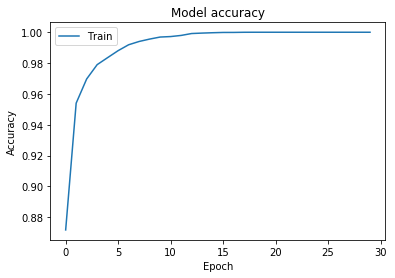

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

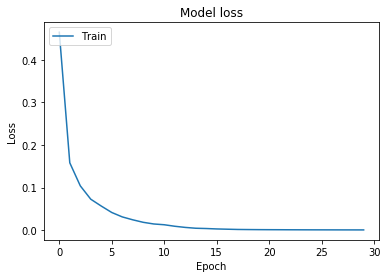

In [9]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
model.evaluate(x_train, y_train)

60000/60000 [==============================] - 4s 74us/sample - loss: 3.0335e-04 - acc: 1.0000


[0.00030334637226575676, 1.0]

In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 78us/sample - loss: 0.0773 - acc: 0.9818


[0.07726743178902307, 0.9818]

In [12]:
y_predict = model.predict(x_test)
print("argmax:", y_predict[0].argmax())
print("np.argmax:", np.argmax(y_predict[0]))

argmax: 7
np.argmax: 7


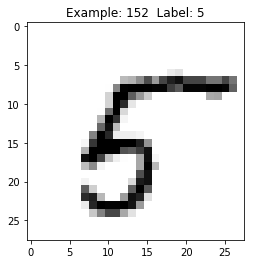

In [13]:
idx = 152
label = y_predict[idx].argmax()
image = x_test[idx].reshape(28,28)
plt.title('Example: %d  Label: %d' % (idx, label))
plt.imshow(image, cmap=plt.get_cmap('gray_r'))
plt.show()

array([[ 972,    1,    1,    0,    1,    0,    2,    1,    2,    0],
       [   0, 1125,    2,    2,    0,    0,    2,    1,    3,    0],
       [   3,    2, 1010,    1,    1,    0,    2,    5,    7,    1],
       [   0,    0,    2,  994,    0,    2,    0,    3,    3,    6],
       [   0,    0,    4,    0,  963,    0,    3,    2,    1,    9],
       [   2,    0,    0,    8,    1,  869,    3,    1,    5,    3],
       [   4,    2,    1,    1,    4,    3,  943,    0,    0,    0],
       [   1,    4,    8,    1,    2,    0,    0, 1004,    3,    5],
       [   3,    1,    2,    3,    3,    2,    2,    2,  951,    5],
       [   3,    2,    0,    1,    8,    2,    0,    4,    2,  987]],
      dtype=int64)

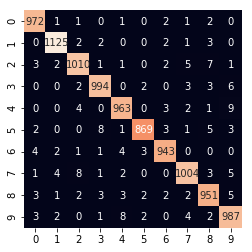

In [14]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, np.argmax(y_predict, axis=1))
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt="d")
mat

In [15]:
""" 
np.not_equal(y_test, np.argmax(test_predictions, axis=1)) 
"""
isFail = y_test != np.argmax(y_predict, axis=1)
x_fail = x_test[isFail]
y_fail = y_test[isFail]
y_predictFail = y_predict[isFail]

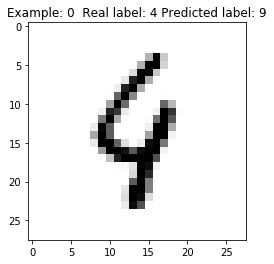

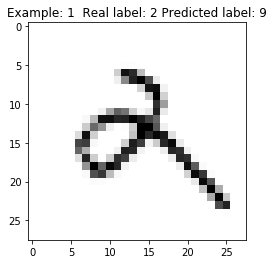

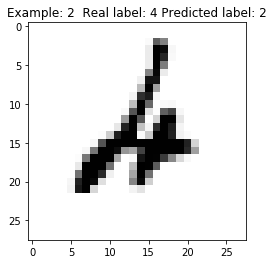

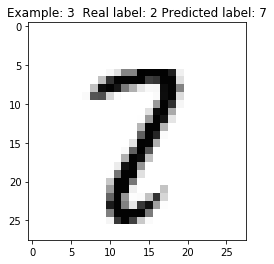

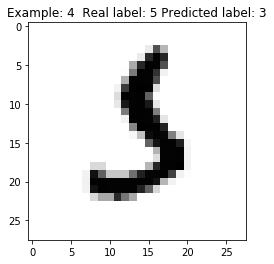

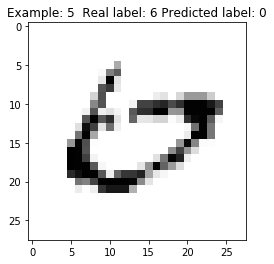

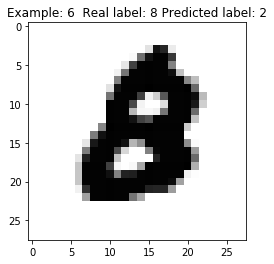

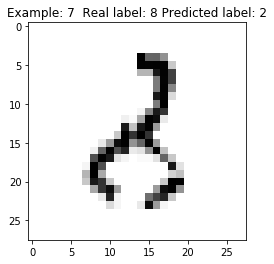

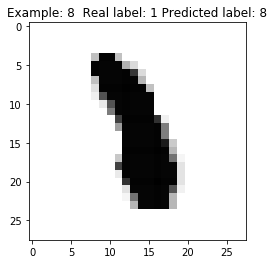

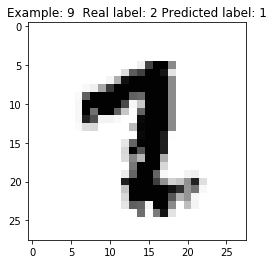

In [16]:
for i in range(10):
    labelReal = y_fail[i]
    labelPred = y_predictFail[i].argmax()
    img = x_fail[i].reshape((28,28))
    plt.title('Example: %d  Real label: %d Predicted label: %d' % (i, labelReal, labelPred))
    plt.imshow(img, cmap="Greys")
    plt.show()